In [16]:
import csv
import pandas as pd

data_book = pd.read_csv('dbms_train.csv', header=None, names=['data'],encoding="cp1252")
data_book

,data
0,Databases and Database Users Databases and dat...
1,For example if we go to the bank to deposit o...
2,Even purchasing items at a supermarket often ...
3,These interactions are examples of what we ma...
4,In the past few years advances in technology ...
...,...
13846,In this sense QBE was the first user friendly...
13847,More recently numerous other user friendly in...
13848,The use of menus graphics and forms is now be...
13849,Filling forms partially to issue a search req...


In [17]:
import gensim
from nltk.stem import WordNetLemmatizer
# nltk.download('omw-1.4')
def ls(text):
    return WordNetLemmatizer().lemmatize(text, pos='v')


# Tokenize and lemmatize
def pp(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 2:
            result.append(ls(token))

    return result

# print("\n")
prepro_data = []
for index,line in data_book.iterrows():
    prepro_data.append(pp(line['data']))

if __name__ == "__main__":
    print(prepro_data)

[['databases', 'database', 'users', 'databases', 'database', 'systems', 'essential', 'component', 'life', 'modern', 'society', 'encounter', 'activities', 'day', 'involve', 'interaction', 'database'], ['example', 'bank', 'deposit', 'withdraw', 'fund', 'hotel', 'airline', 'reservation', 'access', 'computerize', 'library', 'catalog', 'search', 'bibliographic', 'item', 'purchase', 'online', 'book', 'toy', 'chance', 'activities', 'involve', 'program', 'access', 'database'], ['purchase', 'items', 'supermarket', 'automatically', 'update', 'database', 'hold', 'inventory', 'grocery', 'items'], ['interactions', 'examples', 'traditional', 'database', 'applications', 'information', 'store', 'access', 'textual', 'numeric'], ['past', 'years', 'advance', 'technology', 'lead', 'excite', 'new', 'applications', 'database', 'systems'], ['new', 'media', 'technology', 'possible', 'store', 'image', 'audio', 'clip', 'video', 'stream', 'digitally'], ['type', 'file', 'important', 'component', 'multimedia', 'da

In [18]:
# importing libraries
import pandas as pd
import numpy as np
from gsdmm import MovieGroupProcess

# create dictionary of all words in all documents
dictionary = gensim.corpora.Dictionary(prepro_data)

# create variable containing length of dictionary/vocab
vocab_length = len(dictionary)
# print(vocab_length)

# create BOW dictionary
bow_corpus = [dictionary.doc2bow(doc) for doc in prepro_data]
# print(bow_corpus)

# initialize GSDMM
gsdmm = MovieGroupProcess(K=100, alpha=0.1, beta=0.3, n_iters=10)
# print(gsdmm)

# fit GSDMM model
y = gsdmm.fit(prepro_data, vocab_length)
# print(y)

# print number of documents per topic
doc_count = np.array(gsdmm.cluster_doc_count)
# print(gsdmm.cluster_doc_count)
print('Number of documents per topic :', doc_count)

# Topics sorted by the number of document they are allocated to
top_index = doc_count.argsort()[-15:][::-1]
# print(doc_count.argsort())
print('Most important clusters (by number of docs inside):', top_index)

# define function to get top words per topic
for_wcloud = []
topics = []
def top_words(cluster_word_distribution, top_cluster, values):
    for cluster in top_cluster:
        sort_dicts = sorted(cluster_word_distribution[cluster].items(), key=lambda k: k[1], reverse=True)[:values]
        sort_dicts = dict(sort_dicts)
        sum = 0
        topic = []
        for ky in sort_dicts:
            sum += sort_dicts[ky]
            topic.append(ky)
        for ky in sort_dicts:
            sort_dicts[ky] /= sum
            sort_dicts[ky] = round(sort_dicts[ky], 2)

        if len(sort_dicts) == 0:
            continue
        for_wcloud.append(sort_dicts)
        print("\nCluster %s : %s"%(cluster, sort_dicts))
        # topic = []
        # # iterate over top n words in topic
        # for k, v in sort_dicts:
        #     # append words to topic list
        #     topic.append(k)

        # append topics to topics list
        topics.append(topic)
    return topics

# get top words in topics
topics = top_words(gsdmm.cluster_word_distribution, top_index, 8)
# print(gsdmm.cluster_word_distribution)



In stage 0: transferred 13517 clusters with 100 clusters populated
In stage 1: transferred 5568 clusters with 78 clusters populated
In stage 2: transferred 2560 clusters with 49 clusters populated
In stage 3: transferred 2010 clusters with 34 clusters populated
In stage 4: transferred 1902 clusters with 29 clusters populated
In stage 5: transferred 1782 clusters with 29 clusters populated
In stage 6: transferred 1745 clusters with 32 clusters populated
In stage 7: transferred 1703 clusters with 27 clusters populated
In stage 8: transferred 1713 clusters with 26 clusters populated
In stage 9: transferred 1671 clusters with 26 clusters populated
Number of documents per topic : [   0    0    0    9 2530    0   10    0    0    0    0 1155    0    0
    3    2  610    0    0    0    0    0    0    0    0    0    4    0
    0    2    1    0    0    0    0    1   90    0    0    0    0    0
    0    0    0    0    0    0    0 1342    0    5    0    0    0  174
  715 1436    0    0    0    0  

In [19]:
from gensim.models import CoherenceModel

cm_gsdmm = CoherenceModel(topics=topics,
                          dictionary=dictionary,
                          corpus=bow_corpus,
                          texts=prepro_data,
                          coherence='u_mass')

# get coherence value
coherence_gsdmm = cm_gsdmm.get_coherence()
print()
print("Coherence : ",coherence_gsdmm)


Coherence :  -2.9621299147556317


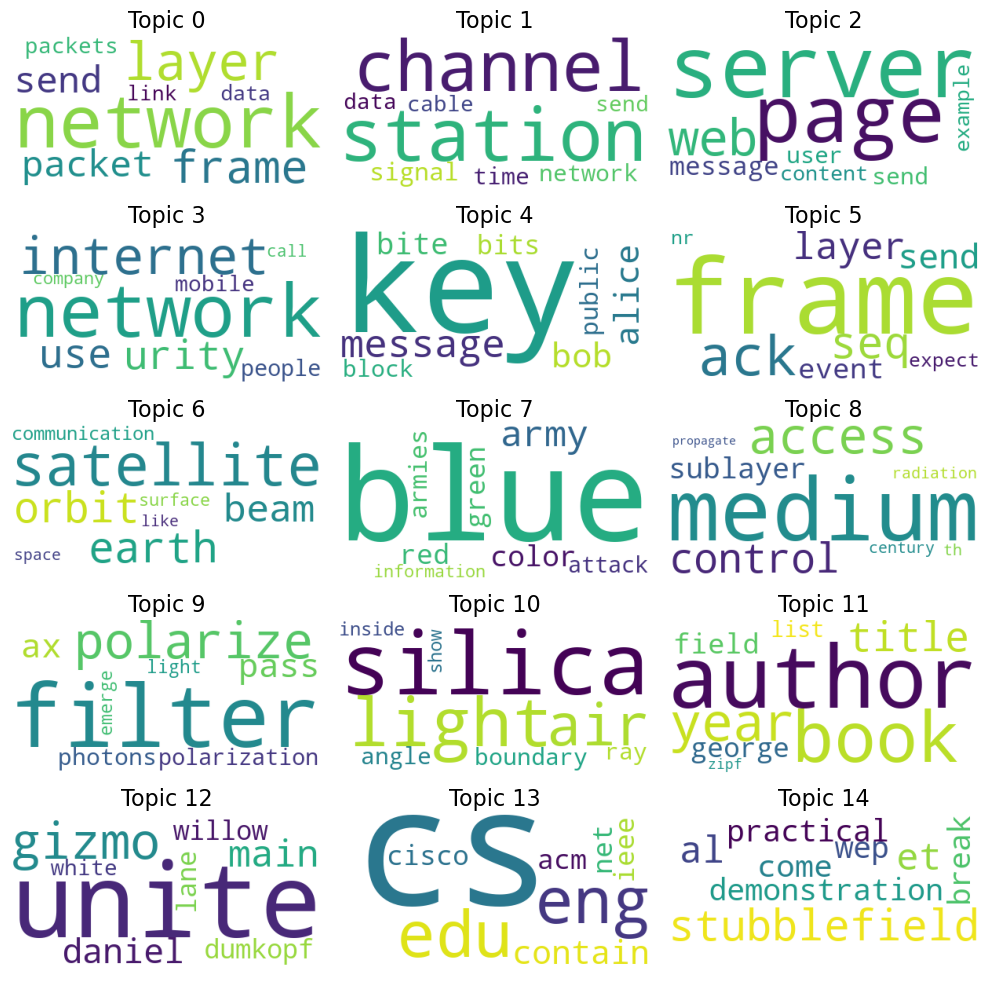

In [4]:

from matplotlib import pyplot as plt
from wordcloud import WordCloud
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(background_color="white",mask=None, max_words=10,\
                        max_font_size=60,min_font_size=10,prefer_horizontal=0.9,
                        contour_width=3,contour_color='black')


fig, axes = plt.subplots(5,3, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = for_wcloud[i]
#     print(topic_words)
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')
    
plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

In [6]:
co_val= []
# get top words in topics
for i in range(5,26):
    print('\n',i)
    topics = top_words(gsdmm.cluster_word_distribution, top_index, i)
    cm_gsdmm = CoherenceModel(topics=topics, 
                          dictionary=dictionary, 
                          corpus=bow_corpus, 
                          texts=prepro_data, 
                          coherence='u_mass')
    # get coherence value
    coherence_gsdmm = cm_gsdmm.get_coherence()  
    co_val.append(coherence_gsdmm)
    print(coherence_gsdmm)


 5

Cluster 82 : {'network': 0.26, 'layer': 0.22, 'frame': 0.18, 'packet': 0.17, 'send': 0.16}

Cluster 103 : {'station': 0.24, 'channel': 0.23, 'signal': 0.19, 'time': 0.17, 'network': 0.17}

Cluster 131 : {'server': 0.25, 'page': 0.24, 'web': 0.21, 'message': 0.16, 'user': 0.13}

Cluster 32 : {'network': 0.46, 'internet': 0.19, 'urity': 0.12, 'use': 0.12, 'people': 0.12}

Cluster 11 : {'key': 0.32, 'message': 0.22, 'bob': 0.17, 'alice': 0.16, 'bite': 0.13}

Cluster 149 : {'frame': 0.41, 'ack': 0.18, 'seq': 0.16, 'layer': 0.13, 'send': 0.12}

Cluster 110 : {'satellite': 0.38, 'earth': 0.18, 'orbit': 0.18, 'beam': 0.15, 'communication': 0.1}

Cluster 70 : {'blue': 0.36, 'army': 0.25, 'color': 0.14, 'red': 0.12, 'green': 0.12}

Cluster 108 : {'medium': 0.25, 'access': 0.24, 'control': 0.24, 'sublayer': 0.24, 'radiation': 0.02}

Cluster 119 : {'filter': 0.38, 'polarize': 0.25, 'pass': 0.12, 'ax': 0.12, 'photons': 0.12}

Cluster 27 : {'silica': 0.23, 'light': 0.23, 'air': 0.2, 'boundary'

-4.365741462265603

 13

Cluster 82 : {'network': 0.14, 'layer': 0.12, 'frame': 0.1, 'packet': 0.09, 'send': 0.09, 'packets': 0.07, 'data': 0.07, 'link': 0.06, 'protocol': 0.06, 'time': 0.06, 'address': 0.05, 'host': 0.05, 'ip': 0.04}

Cluster 103 : {'station': 0.12, 'channel': 0.11, 'signal': 0.09, 'time': 0.08, 'network': 0.08, 'send': 0.07, 'data': 0.07, 'cable': 0.07, 'use': 0.07, 'frame': 0.07, 'telephone': 0.06, 'bits': 0.06, 'transmit': 0.06}

Cluster 131 : {'server': 0.14, 'page': 0.13, 'web': 0.12, 'message': 0.09, 'user': 0.07, 'send': 0.07, 'content': 0.06, 'example': 0.06, 'address': 0.06, 'file': 0.06, 'request': 0.05, 'use': 0.05, 'client': 0.05}

Cluster 32 : {'network': 0.26, 'internet': 0.11, 'urity': 0.07, 'use': 0.07, 'people': 0.07, 'mobile': 0.07, 'company': 0.06, 'call': 0.05, 'work': 0.05, 'protocols': 0.05, 'different': 0.05, 'telephone': 0.05, 'example': 0.04}

Cluster 11 : {'key': 0.2, 'message': 0.14, 'bob': 0.1, 'alice': 0.1, 'bite': 0.08, 'bits': 0.06, 'pub

-5.081435131377021

 17

Cluster 82 : {'network': 0.12, 'layer': 0.1, 'frame': 0.08, 'packet': 0.08, 'send': 0.07, 'packets': 0.06, 'data': 0.06, 'link': 0.05, 'protocol': 0.05, 'time': 0.05, 'address': 0.04, 'host': 0.04, 'ip': 0.04, 'connection': 0.04, 'transport': 0.04, 'router': 0.04, 'tcp': 0.04}

Cluster 103 : {'station': 0.1, 'channel': 0.09, 'signal': 0.08, 'time': 0.07, 'network': 0.07, 'send': 0.06, 'data': 0.06, 'cable': 0.05, 'use': 0.05, 'frame': 0.05, 'telephone': 0.05, 'bits': 0.05, 'transmit': 0.05, 'bite': 0.05, 'call': 0.05, 'switch': 0.04, 'bandwidth': 0.04}

Cluster 131 : {'server': 0.12, 'page': 0.11, 'web': 0.1, 'message': 0.07, 'user': 0.06, 'send': 0.06, 'content': 0.05, 'example': 0.05, 'address': 0.05, 'file': 0.05, 'request': 0.05, 'use': 0.04, 'client': 0.04, 'browser': 0.04, 'program': 0.04, 'mail': 0.04, 'information': 0.03}

Cluster 32 : {'network': 0.23, 'internet': 0.09, 'urity': 0.06, 'use': 0.06, 'people': 0.06, 'mobile': 0.06, 'company': 0.05, 'call'

-5.426562733723588

 19

Cluster 82 : {'network': 0.11, 'layer': 0.1, 'frame': 0.08, 'packet': 0.07, 'send': 0.07, 'packets': 0.06, 'data': 0.05, 'link': 0.05, 'protocol': 0.04, 'time': 0.04, 'address': 0.04, 'host': 0.04, 'ip': 0.04, 'connection': 0.04, 'transport': 0.04, 'router': 0.03, 'tcp': 0.03, 'number': 0.03, 'service': 0.03}

Cluster 103 : {'station': 0.09, 'channel': 0.08, 'signal': 0.07, 'time': 0.06, 'network': 0.06, 'send': 0.05, 'data': 0.05, 'cable': 0.05, 'use': 0.05, 'frame': 0.05, 'telephone': 0.05, 'bits': 0.05, 'transmit': 0.04, 'bite': 0.04, 'call': 0.04, 'switch': 0.04, 'bandwidth': 0.04, 'line': 0.04, 'ethernet': 0.04}

Cluster 131 : {'server': 0.11, 'page': 0.1, 'web': 0.09, 'message': 0.07, 'user': 0.06, 'send': 0.06, 'content': 0.05, 'example': 0.05, 'address': 0.05, 'file': 0.05, 'request': 0.04, 'use': 0.04, 'client': 0.04, 'browser': 0.04, 'program': 0.04, 'mail': 0.04, 'information': 0.03, 'fig': 0.03, 'type': 0.03}

Cluster 32 : {'network': 0.21, 'interne

-5.741703953136834

 21

Cluster 82 : {'network': 0.11, 'layer': 0.09, 'frame': 0.07, 'packet': 0.07, 'send': 0.07, 'packets': 0.06, 'data': 0.05, 'link': 0.04, 'protocol': 0.04, 'time': 0.04, 'address': 0.04, 'host': 0.03, 'ip': 0.03, 'connection': 0.03, 'transport': 0.03, 'router': 0.03, 'tcp': 0.03, 'number': 0.03, 'service': 0.03, 'rout': 0.03, 'use': 0.03}

Cluster 103 : {'station': 0.08, 'channel': 0.08, 'signal': 0.07, 'time': 0.06, 'network': 0.06, 'send': 0.05, 'data': 0.05, 'cable': 0.05, 'use': 0.05, 'frame': 0.05, 'telephone': 0.04, 'bits': 0.04, 'transmit': 0.04, 'bite': 0.04, 'call': 0.04, 'switch': 0.04, 'bandwidth': 0.04, 'line': 0.04, 'ethernet': 0.04, 'fiber': 0.03, 'mbps': 0.03}

Cluster 131 : {'server': 0.1, 'page': 0.1, 'web': 0.09, 'message': 0.07, 'user': 0.06, 'send': 0.05, 'content': 0.05, 'example': 0.04, 'address': 0.04, 'file': 0.04, 'request': 0.04, 'use': 0.04, 'client': 0.04, 'browser': 0.04, 'program': 0.04, 'mail': 0.03, 'information': 0.03, 'fig': 0.03

-6.013043368983648

 23

Cluster 82 : {'network': 0.1, 'layer': 0.09, 'frame': 0.07, 'packet': 0.07, 'send': 0.06, 'packets': 0.05, 'data': 0.05, 'link': 0.04, 'protocol': 0.04, 'time': 0.04, 'address': 0.04, 'host': 0.03, 'ip': 0.03, 'connection': 0.03, 'transport': 0.03, 'router': 0.03, 'tcp': 0.03, 'number': 0.03, 'service': 0.03, 'rout': 0.03, 'use': 0.02, 'sender': 0.02, 'fig': 0.02}

Cluster 103 : {'station': 0.08, 'channel': 0.07, 'signal': 0.06, 'time': 0.05, 'network': 0.05, 'send': 0.05, 'data': 0.05, 'cable': 0.04, 'use': 0.04, 'frame': 0.04, 'telephone': 0.04, 'bits': 0.04, 'transmit': 0.04, 'bite': 0.04, 'call': 0.04, 'switch': 0.04, 'bandwidth': 0.03, 'line': 0.03, 'ethernet': 0.03, 'fiber': 0.03, 'mbps': 0.03, 'transmission': 0.03, 'frequency': 0.03}

Cluster 131 : {'server': 0.1, 'page': 0.09, 'web': 0.08, 'message': 0.06, 'user': 0.05, 'send': 0.05, 'content': 0.04, 'example': 0.04, 'address': 0.04, 'file': 0.04, 'request': 0.04, 'use': 0.04, 'client': 0.04, 'browser':

-6.257442849062764

 25

Cluster 82 : {'network': 0.1, 'layer': 0.08, 'frame': 0.07, 'packet': 0.06, 'send': 0.06, 'packets': 0.05, 'data': 0.05, 'link': 0.04, 'protocol': 0.04, 'time': 0.04, 'address': 0.03, 'host': 0.03, 'ip': 0.03, 'connection': 0.03, 'transport': 0.03, 'router': 0.03, 'tcp': 0.03, 'number': 0.03, 'service': 0.03, 'rout': 0.03, 'use': 0.02, 'sender': 0.02, 'fig': 0.02, 'congestion': 0.02, 'header': 0.02}

Cluster 103 : {'station': 0.07, 'channel': 0.07, 'signal': 0.06, 'time': 0.05, 'network': 0.05, 'send': 0.05, 'data': 0.04, 'cable': 0.04, 'use': 0.04, 'frame': 0.04, 'telephone': 0.04, 'bits': 0.04, 'transmit': 0.04, 'bite': 0.04, 'call': 0.03, 'switch': 0.03, 'bandwidth': 0.03, 'line': 0.03, 'ethernet': 0.03, 'fiber': 0.03, 'mbps': 0.03, 'transmission': 0.03, 'frequency': 0.03, 'slot': 0.03, 'different': 0.03}

Cluster 131 : {'server': 0.09, 'page': 0.09, 'web': 0.08, 'message': 0.06, 'user': 0.05, 'send': 0.05, 'content': 0.04, 'example': 0.04, 'address': 0.04, 

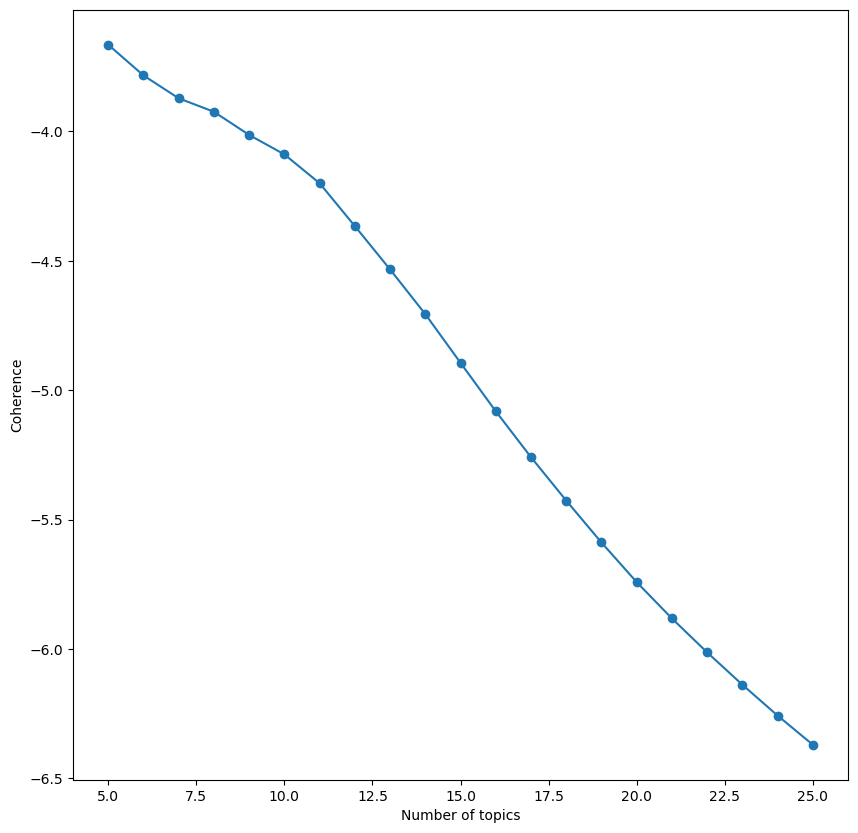

In [7]:
import matplotlib.pyplot as plt
axisy = list(range(5,26))
plt.figure(figsize=(10,10))
plt.plot(axisy,co_val,marker = 'o')
plt.xlabel("Number of topics")
plt.ylabel("Coherence")
plt.show()